# Linear Regression

* **Input Instance** - Feature Vector:  $x = (x_0, x_1, x_2,... x_n)$
* **Predicted Output**: $ \hat{y} = \hat{w_0}.x_0 + \hat{w_1}.x_1 +...+ \hat{w_n}.x_n + \hat{b}$
* **Parameters to Estimate** : 
  1. Feature Weights $\hat{w} = (\hat{w_0},...,\hat{w_n})$
  2. Constant bias term / Intercept : $\hat{b}$

The $\hat{w}$ and $\hat{b}$ values which we call the train parameters or coefficients are estimated from training data. And $\hat{y}$ is estimated from the linear function of input feature values and the train parameters. 

### Ordinary Least Squares

<img src="https://bookdown.org/sbikienga/Intro_to_stat_book/images/chap7/ols.jpg" width="400" />

### Estimating $w$ and $b$ parameters
1. Estimated from training data
2. The algorithm uses an objective function and optimises it. In ordinary least squares algorithm the **objective function is the sum of squared differences (RSS) or Residual Sum of Squares** over the training data between predicted target and actual target values.
\begin{equation}
RSS(w,b) = \sum_{i=1}^N (y_i - (w.x_i + b))^2
\end{equation}
3. This linear model does not havee control paramters to control model complexity. It uses all of the training points to find the least squares.

### 1. Import Libraries

In [10]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

### 2. Create Dataset - Simple Regression

<IPython.core.display.Javascript object>


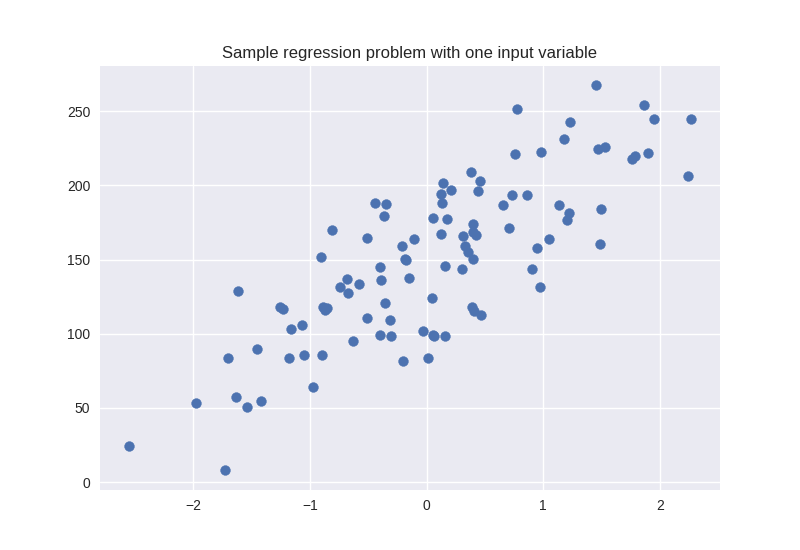

In [11]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

### 3. Train-test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 42)
print ('Training Set Dimensions : ', X_train.shape)
print ('Test Set Dimensions : ', X_test.shape)

Training Set Dimensions :  (75, 1)
Test Set Dimensions :  (25, 1)


### 4. Linear Model

In [16]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)
linreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 5. Coefficient, intercept and R-squared values

In [17]:
print('linear model coeff (w): {}'
     .format(linreg.coef_[0]))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): 42.31190224627563
linear model intercept (b): 145.455
R-squared score (training): 0.613
R-squared score (test): 0.714


### 6. Least Squares linear solution

<IPython.core.display.Javascript object>


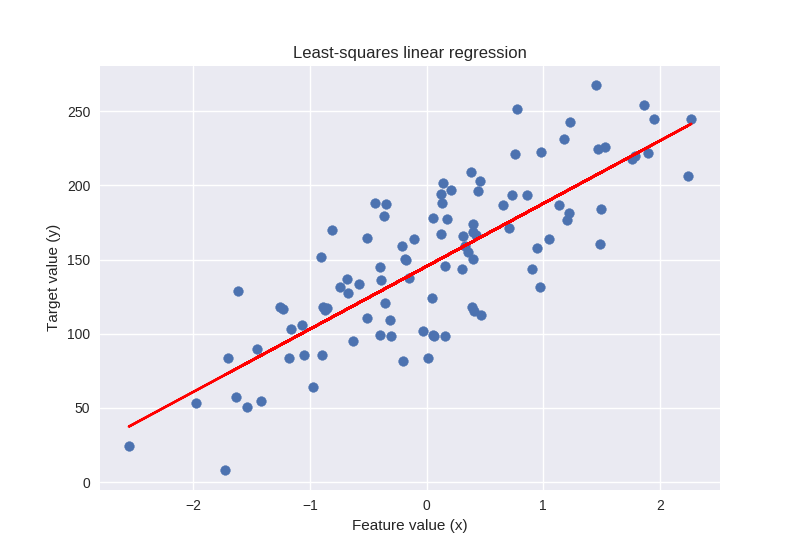

In [18]:
plt.figure()
plt.scatter(X_R1,y_R1)
plt.plot(X_R1, linreg.intercept_ + linreg.coef_*X_R1, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

<IPython.core.display.Javascript object>


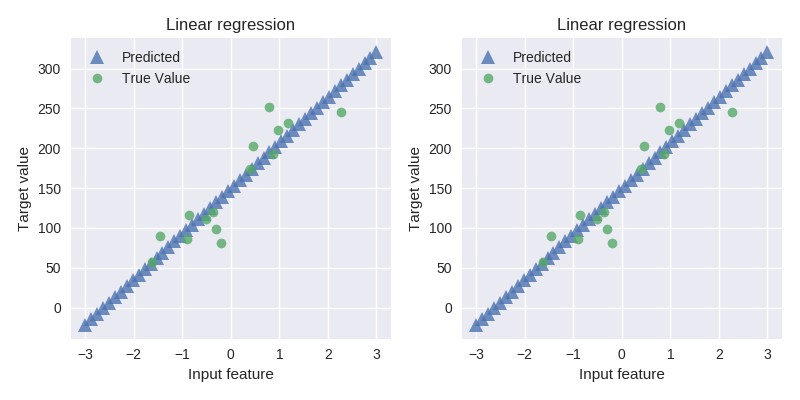

In [7]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis in subaxes:
    reg = LinearRegression().fit(X_train, y_train)
    y_predict_output = reg.predict(X_predict_input)
#     thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('Linear regression')
    thisaxis.legend()
plt.tight_layout()